In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from scipy import stats
from astropy.time import Time

### データの読み込み

In [2]:
train_ts = pd.read_csv("../data/input/training_set.csv")
display(train_ts.head())

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [3]:
train_meta = pd.read_csv("../data/input/training_set_metadata.csv")
display(train_meta.head())

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


### Grouperでデータ点を揃える

#### サンプル

In [45]:
train_ts['mjd_dt'] = pd.to_datetime(Time(train_ts.mjd.values, format='mjd').iso)
train_ts = train_ts.sort_values(['object_id', 'mjd_dt'])
train_ts.head()

,object_id,mjd,passband,flux,flux_err,detected,mjd_dt
0,615,59750.4229,2,-544.810303,3.622952,1,2022-06-20 10:08:58.560
1,615,59750.4306,1,-816.434326,5.553370,1,2022-06-20 10:20:03.840
2,615,59750.4383,3,-471.385529,3.801213,1,2022-06-20 10:31:09.120
3,615,59750.4450,4,-388.984985,11.395031,1,2022-06-20 10:40:48.000
4,615,59752.4070,2,-681.858887,4.041204,1,2022-06-22 09:46:04.800


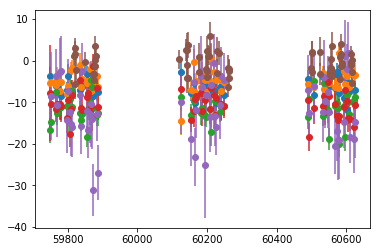

In [85]:
object_id = 282647
sample_data = train_ts.query('object_id == @object_id')

for passband in sample_data.passband.unique():
    extract_pb = sample_data.query('passband == @passband')
    plt.errorbar(extract_pb.mjd, extract_pb.flux, extract_pb.flux_err, fmt='o')

In [159]:
pivot = pd.pivot_table(sample_data, index=pd.Grouper(key='mjd_dt', freq='30d'),
                       columns='passband', values=['flux', 'flux_err'], aggfunc=[np.mean])
pivot.reset_index(drop=False, inplace=True)
pivot

mjd_dt      mean                                  \
                                      flux                                   
passband                                 0          1         2          3   
0        2022-06-20 10:08:58.560       NaN  -5.649303 -6.345367 -12.520832   
1        2022-07-20 10:08:58.560       NaN  -5.776220 -6.560829 -10.523665   
2        2022-08-19 10:08:58.560 -0.458336  -3.034688 -6.677867 -12.664862   
3        2022-09-18 10:08:58.560 -0.374494  -5.001231 -6.818556 -10.631294   
4        2022-10-18 10:08:58.560 -1.078993  -5.414066 -7.601847 -12.409848   
5        2023-06-15 10:08:58.560  1.422488 -14.599673 -2.826946  -8.628439   
6        2023-07-15 10:08:58.560 -0.614406  -4.929770 -8.005543 -10.151539   
7        2023-08-14 10:08:58.560 -1.067317  -5.443557 -6.184233 -12.603074   
8        2023-09-13 10:08:58.560  0.867310  -4.065130 -7.043350 -12.315377   
9        2023-10-13 10:08:58.560  0.087614  -5.656609 -7.312734 -11.454931   
10       2023-11-12 10:08:58.560 -3.744196        NaN       NaN        NaN   
11       2024-06-09 10:08:58.560  0.172741  -6.027316 -5.473294 -11.393624   
12       2024-07-09 10:08:58.560 -0.518691  -6.273613 -8.370476  -4.902426   
13       2024-08-08 10:08:58.560 -1.482678  -6.467325 -5.275565 -12.115488   
14       2024-09-07 10:08:58.560 -0.129266  -4.055999 -5.200871 -13.134821   
15       2024-10-07 10:08:58.560 -1.264587  -4.823122 -8.557444 -12.033048   
16       2024-11-06 10:08:58.560       NaN  -3.442801 -8.614679  -9.112044   

                                                                        \
                                flux_err                                 
passband          4          5         0         1         2         3   
0        -10.118233  -6.418260       NaN  2.454274  2.209938  2.768911   
1        -12.722282 -10.338546       NaN  2.378423  2.156422  2.898079   
2         -8.027454 -13.394289  3.107524  2.197804  2.019894  2.709843   
3        -10.849970 -11.434752  2.499375  2.008615  1.943170  2.618980   
4         -6.322140 -23.662108  2.321540  2.329024  1.976561  2.621341   
5         -6.895031  -9.830688  2.451769  3.284094  2.749133  3.212830   
6        -11.053581 -14.722225  3.281960  2.197006  2.013473  2.764625   
7         -9.422325 -10.874896  3.234167  2.124977  2.094248  2.823316   
8         -9.756556  -9.874033  3.067415  2.160739  2.097372  2.758760   
9        -10.581810  -6.389975  3.025034  2.147463  2.020675  2.740777   
10              NaN        NaN  2.587693       NaN       NaN       NaN   
11       -13.955785  -9.744803  2.991717  2.075563  2.015706  2.756912   
12       -11.404847  -6.153377  3.093945  3.793765  2.870615  3.337732   
13        -9.126980  -9.141348  2.909771  2.517548  2.177048  2.825119   
14       -12.850839 -18.921095  2.771352  2.374117  2.171903  2.937420   
15       -11.162708  -6.422226  2.168594  2.153960  1.997927  2.621029   
16       -13.315200 -16.832927       NaN  2.247116  2.033428  2.782247   

                              
                              
passband         4         5  
0         4.978345  8.159040  
1         3.541267  7.712266  
2         3.337758  6.972811  
3         3.337657  7.449050  
4         2.997358  6.437256  
5         3.709678  7.847061  
6         3.301867  7.345577  
7         3.768949  9.245489  
8         3.448319  7.912278  
9         3.375155  7.288034  
10             NaN       NaN  
11        3.533711  7.808887  
12        3.947930  8.470823  
13        3.528699  7.778484  
14        3.720891  8.175767  
15        3.223379  6.927059  
16        3.580950  8.299417

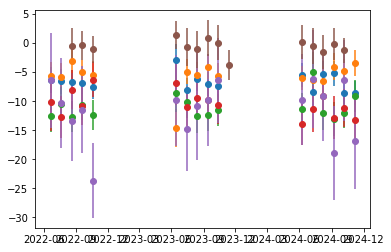

In [160]:
for passband in sample_data.passband.unique():
    plt.errorbar(pivot.mjd_dt.values, 
                 pivot["mean"]["flux"][passband].values, 
                 pivot["mean"]["flux_err"][passband].values, fmt='o')

#### 複数のobject_idで処理

In [111]:
pivot = pd.pivot_table(train_ts, index=['object_id', pd.Grouper(key='mjd_dt', freq='30d')],
                       columns='passband', values=['flux', 'flux_err'], aggfunc=[np.mean])
pivot.reset_index(drop=False, inplace=True)
pivot

object_id                  mjd_dt         mean               \
                                                    flux                
passband                                               0            1   
0               615 2022-05-31 00:49:23.520          NaN  -938.945678   
1               615 2022-06-30 00:49:23.520          NaN  -751.332375   
2               615 2022-07-30 00:49:23.520     6.878784  -376.640616   
3               615 2022-08-29 00:49:23.520   -37.472954  -712.001541   
4               615 2022-09-28 00:49:23.520   -73.571703   -71.289753   
5               615 2022-10-28 00:49:23.520          NaN  -590.346161   
6               615 2023-05-26 00:49:23.520  -107.080536          NaN   
7               615 2023-06-25 00:49:23.520    42.322191  -878.043396   
8               615 2023-07-25 00:49:23.520   -68.532922  -723.394274   
9               615 2023-08-24 00:49:23.520    49.343418  -306.920441   
10              615 2023-09-23 00:49:23.520   -27.101213  -306.354165   
11              615 2023-10-23 00:49:23.520    78.564053   660.626343   
12              615 2024-06-19 00:49:23.520    45.789443  -562.869329   
13              615 2024-07-19 00:49:23.520   104.003242  -155.849866   
14              615 2024-08-18 00:49:23.520   -30.930919  -635.587748   
15              615 2024-09-17 00:49:23.520   -63.695073  -260.785510   
16              615 2024-10-17 00:49:23.520    21.843351    -1.833142   
17              713 2022-08-29 00:49:23.520          NaN     5.553639   
18              713 2022-09-28 00:49:23.520     3.541084     1.923648   
19              713 2022-10-28 00:49:23.520     6.657097     5.237607   
20              713 2022-11-27 00:49:23.520     3.492873     5.631560   
21              713 2022-12-27 00:49:23.520          NaN    -0.538517   
22              713 2023-08-24 00:49:23.520     6.209556     4.172818   
23              713 2023-09-23 00:49:23.520     4.067199     0.871533   
24              713 2023-10-23 00:49:23.520     0.086369    -1.045694   
25              713 2023-11-22 00:49:23.520    -3.588124    -1.281622   
26              713 2023-12-22 00:49:23.520          NaN    -3.599649   
27              713 2024-08-18 00:49:23.520    -9.205668    -8.954789   
28              713 2024-09-17 00:49:23.520    -8.303263    -7.009581   
29              713 2024-10-17 00:49:23.520   -10.525673    -8.453804   
...             ...                     ...          ...          ...   
172882    130772921 2024-02-20 00:49:23.520          NaN          NaN   
172883    130772921 2024-03-21 00:49:23.520          NaN          NaN   
172884    130772921 2024-04-20 00:49:23.520          NaN          NaN   
172885    130772921 2024-07-19 00:49:23.520          NaN    -5.291557   
172886    130772921 2024-08-18 00:49:23.520    13.092875     1.223367   
172887    130772921 2024-09-17 00:49:23.520    17.382421          NaN   
172888    130772921 2024-10-17 00:49:23.520    -8.372218   322.255371   
172889    130772921 2024-11-16 00:49:23.520    -4.867039    -1.161819   
172890    130772921 2024-12-16 00:49:23.520          NaN          NaN   
172891    130779836 2022-05-01 00:49:23.520          NaN          NaN   
172892    130779836 2022-05-31 00:49:23.520          NaN   759.056091   
172893    130779836 2022-06-30 00:49:23.520          NaN          NaN   
172894    130779836 2022-07-30 00:49:23.520  1059.291504  3204.610107   
172895    130779836 2022-08-29 00:49:23.520          NaN          NaN   
172896    130779836 2022-09-28 00:49:23.520  7761.321777          NaN   
172897    130779836 2023-02-25 00:49:23.520          NaN          NaN   
172898    130779836 2023-03-27 00:49:23.520          NaN   848.485596   
172899    130779836 2023-04-26 00:49:23.520   129.561722   441.659821   
172900    130779836 2023-05-26 00:49:23.520    73.535820          NaN   
172901    130779836 2023-06-25 00:49:23.520    90.714111   100.993713   
172902    130779836 2023-07-25 00:49:23.520          NaN    86.37455

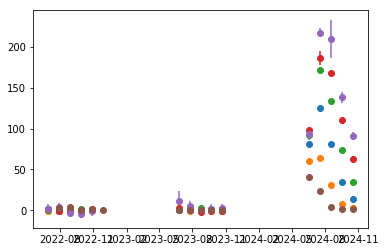

In [236]:
extract_obj = pivot[pivot['object_id']==object_id]
for passband in sample_data.passband.unique():
    plt.errorbar(extract_obj.mjd_dt.values, 
                 extract_obj["mean"]["flux"][passband].values, 
                 extract_obj["mean"]["flux_err"][passband].values, fmt='o')

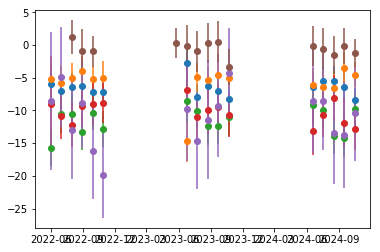

In [237]:
extract_obj = pivot[pivot['object_id']==282647]
for passband in sample_data.passband.unique():
    plt.errorbar(extract_obj.mjd_dt.values, 
                 extract_obj["mean"]["flux"][passband].values, 
                 extract_obj["mean"]["flux_err"][passband].values, fmt='o')

### Grouperの期間の調査

In [149]:
for freq in ['6h', '1d', '3d', '5d', '7d', '14d', '30d', '60d', '90d', '120d']:
    pivot = pd.pivot_table(train_ts, index=['object_id', pd.Grouper(key='mjd_dt', freq=freq)],
                           columns='passband', values=['flux'], aggfunc=[np.mean])
    print(freq, pivot.shape[0], pivot.dropna().shape[0]/pivot.shape[0])

6h 965638 0.0
1d 948082 0.0
3d 730498 0.0042724278505895975
5d 588304 0.028529467758165845
7d 493477 0.03254457654561408
14d 319639 0.09257944118208354
30d 172912 0.2036585083742019
60d 101595 0.3809833161080762
90d 75616 0.4872910495133305
120d 63376 0.5303584953294622


### 各バンドの相対値の算出

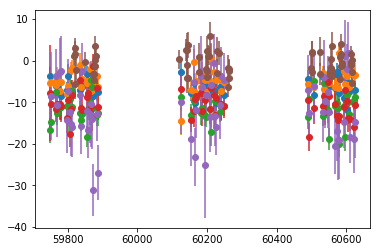

In [238]:
object_id = 282647
sample_data = train_ts.query('object_id == @object_id')

for passband in sample_data.passband.unique():
    extract_pb = sample_data.query('passband == @passband')
    plt.errorbar(extract_pb.mjd, extract_pb.flux, extract_pb.flux_err, fmt='o')

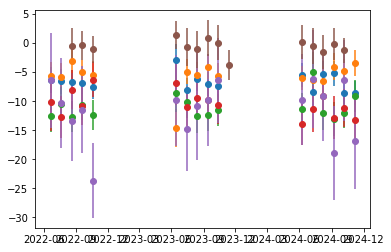

In [239]:
pivot = pd.pivot_table(sample_data, index=pd.Grouper(key='mjd_dt', freq='30d'),
                       columns='passband', values=['flux', 'flux_err'], aggfunc=[np.mean])
pivot.reset_index(drop=False, inplace=True)
pivot.head()

for passband in sample_data.passband.unique():
    plt.errorbar(pivot.mjd_dt.values, 
                 pivot["mean"]["flux"][passband].values, 
                 pivot["mean"]["flux_err"][passband].values, fmt='o')

In [240]:
base_pb = 5
for pb in [0, 1, 2, 3, 4]:
    pivot[f"flux_{pb}-{base_pb}"] = pivot["mean"]["flux"][pb] - pivot["mean"]["flux"][base_pb]
    pivot[f"flux_err_{pb}-{base_pb}"] = \
        np.sqrt(pivot["mean"]["flux_err"][pb]**2 + pivot["mean"]["flux_err"][base_pb]**2)
pivot.reset_index(drop=False, inplace=True)
pivot.head()

index                  mjd_dt      mean                      \
                                            flux                       
passband                                       0         1         2   
0            0 2022-06-20 10:08:58.560       NaN -5.649303 -6.345367   
1            1 2022-07-20 10:08:58.560       NaN -5.776220 -6.560829   
2            2 2022-08-19 10:08:58.560 -0.458336 -3.034688 -6.677867   
3            3 2022-09-18 10:08:58.560 -0.374494 -5.001231 -6.818556   
4            4 2022-10-18 10:08:58.560 -1.078993 -5.414066 -7.601847   

                                                                  ...       \
                                           flux_err               ...        
passband          3          4          5         0         1     ...        
0        -12.520832 -10.118233  -6.418260       NaN  2.454274     ...        
1        -10.523665 -12.722282 -10.338546       NaN  2.378423     ...        
2        -12.664862  -8.027454 -13.394289  3.107524  2.197804     ...        
3        -10.631294 -10.849970 -11.434752  2.499375  2.008615     ...        
4        -12.409848  -6.322140 -23.662108  2.321540  2.329024     ...        

           flux_0-5 flux_err_0-5   flux_1-5 flux_err_1-5   flux_2-5  \
                                                                      
passband                                                              
0               NaN          NaN   0.768957     8.520176   0.072893   
1               NaN          NaN   4.562326     8.070684   3.777717   
2         12.935953     7.633924  10.359601     7.310980   6.716422   
3         11.060258     7.857177   6.433521     7.715108   4.616196   
4         22.583115     6.843085  18.248041     6.845627  16.060261   

         flux_err_2-5   flux_3-5 flux_err_3-5   flux_4-5 flux_err_4-5  
                                                                       
passband                                                               
0            8.453033  -6.102572     8.616078  -3.699973     9.557921  
1            8.008071  -0.185119     8.238805  -2.383737     8.486438  
2            7.259481   0.729427     7.480865   5.366835     7.730506  
3            7.698328   0.803458     7.896037   0.584782     8.162616  
4            6.733874  11.252260     6.950517  17.339968     7.100874  

[5 rows x 24 columns]

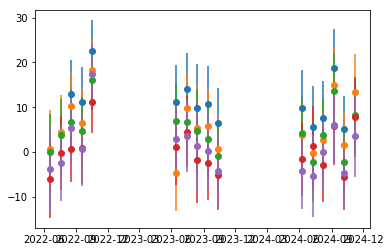

In [241]:
base_pb = 5
for pb in [0, 1, 2, 3, 4]:
    plt.errorbar(pivot.mjd_dt.values, 
                 pivot[f"flux_{pb}-{base_pb}"].values, 
                 pivot[f"flux_err_{pb}-{base_pb}"].values, fmt='o')

#### 全組み合わせを計算する価値があるか確認

In [230]:
pivot = pd.pivot_table(train_ts, index=['object_id', pd.Grouper(key='mjd_dt', freq='30d')],
                       columns='passband', values=['flux', 'flux_err'], aggfunc=[np.mean])
pivot.reset_index(drop=False, inplace=True)
pivot

object_id                  mjd_dt         mean               \
                                                    flux                
passband                                               0            1   
0               615 2022-05-31 00:49:23.520          NaN  -938.945678   
1               615 2022-06-30 00:49:23.520          NaN  -751.332375   
2               615 2022-07-30 00:49:23.520     6.878784  -376.640616   
3               615 2022-08-29 00:49:23.520   -37.472954  -712.001541   
4               615 2022-09-28 00:49:23.520   -73.571703   -71.289753   
5               615 2022-10-28 00:49:23.520          NaN  -590.346161   
6               615 2023-05-26 00:49:23.520  -107.080536          NaN   
7               615 2023-06-25 00:49:23.520    42.322191  -878.043396   
8               615 2023-07-25 00:49:23.520   -68.532922  -723.394274   
9               615 2023-08-24 00:49:23.520    49.343418  -306.920441   
10              615 2023-09-23 00:49:23.520   -27.101213  -306.354165   
11              615 2023-10-23 00:49:23.520    78.564053   660.626343   
12              615 2024-06-19 00:49:23.520    45.789443  -562.869329   
13              615 2024-07-19 00:49:23.520   104.003242  -155.849866   
14              615 2024-08-18 00:49:23.520   -30.930919  -635.587748   
15              615 2024-09-17 00:49:23.520   -63.695073  -260.785510   
16              615 2024-10-17 00:49:23.520    21.843351    -1.833142   
17              713 2022-08-29 00:49:23.520          NaN     5.553639   
18              713 2022-09-28 00:49:23.520     3.541084     1.923648   
19              713 2022-10-28 00:49:23.520     6.657097     5.237607   
20              713 2022-11-27 00:49:23.520     3.492873     5.631560   
21              713 2022-12-27 00:49:23.520          NaN    -0.538517   
22              713 2023-08-24 00:49:23.520     6.209556     4.172818   
23              713 2023-09-23 00:49:23.520     4.067199     0.871533   
24              713 2023-10-23 00:49:23.520     0.086369    -1.045694   
25              713 2023-11-22 00:49:23.520    -3.588124    -1.281622   
26              713 2023-12-22 00:49:23.520          NaN    -3.599649   
27              713 2024-08-18 00:49:23.520    -9.205668    -8.954789   
28              713 2024-09-17 00:49:23.520    -8.303263    -7.009581   
29              713 2024-10-17 00:49:23.520   -10.525673    -8.453804   
...             ...                     ...          ...          ...   
172882    130772921 2024-02-20 00:49:23.520          NaN          NaN   
172883    130772921 2024-03-21 00:49:23.520          NaN          NaN   
172884    130772921 2024-04-20 00:49:23.520          NaN          NaN   
172885    130772921 2024-07-19 00:49:23.520          NaN    -5.291557   
172886    130772921 2024-08-18 00:49:23.520    13.092875     1.223367   
172887    130772921 2024-09-17 00:49:23.520    17.382421          NaN   
172888    130772921 2024-10-17 00:49:23.520    -8.372218   322.255371   
172889    130772921 2024-11-16 00:49:23.520    -4.867039    -1.161819   
172890    130772921 2024-12-16 00:49:23.520          NaN          NaN   
172891    130779836 2022-05-01 00:49:23.520          NaN          NaN   
172892    130779836 2022-05-31 00:49:23.520          NaN   759.056091   
172893    130779836 2022-06-30 00:49:23.520          NaN          NaN   
172894    130779836 2022-07-30 00:49:23.520  1059.291504  3204.610107   
172895    130779836 2022-08-29 00:49:23.520          NaN          NaN   
172896    130779836 2022-09-28 00:49:23.520  7761.321777          NaN   
172897    130779836 2023-02-25 00:49:23.520          NaN          NaN   
172898    130779836 2023-03-27 00:49:23.520          NaN   848.485596   
172899    130779836 2023-04-26 00:49:23.520   129.561722   441.659821   
172900    130779836 2023-05-26 00:49:23.520    73.535820          NaN   
172901    130779836 2023-06-25 00:49:23.520    90.714111   100.993713   
172902    130779836 2023-07-25 00:49:23.520          NaN    86.37455

In [17]:
import itertools
comb = list(itertools.combinations(train_ts.passband.unique(), 2))
comb, len(comb)

([(2, 1),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 0),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 0),
  (3, 4),
  (3, 5),
  (3, 0),
  (4, 5),
  (4, 0),
  (5, 0)],
 15)

In [232]:
col_list = []
for base_pb, target_pb in comb:
    pivot[f"flux_{target_pb}-{base_pb}"] = pivot["mean"]["flux"][target_pb] - pivot["mean"]["flux"][base_pb]
    pivot[f"flux_err_{target_pb}-{base_pb}"] = \
        np.sqrt(pivot["mean"]["flux_err"][target_pb]**2 + pivot["mean"]["flux_err"][base_pb]**2)
    col_list.extend([f"flux_{target_pb}-{base_pb}"])
pivot.head()

object_id                  mjd_dt       mean                          \
                                                 flux                           
passband                                            0           1           2   
0              615 2022-05-31 00:49:23.520        NaN -938.945678 -613.334595   
1              615 2022-06-30 00:49:23.520        NaN -751.332375 -503.369988   
2              615 2022-07-30 00:49:23.520   6.878784 -376.640616 -143.477466   
3              615 2022-08-29 00:49:23.520 -37.472954 -712.001541 -398.733591   
4              615 2022-09-28 00:49:23.520 -73.571703  -71.289753  116.399495   

                                                                     ...       \
                                              flux_err               ...        
passband           3           4           5         0         1     ...        
0        -498.170060 -391.232605 -355.886780       NaN  6.013182     ...        
1        -446.939911 -390.251037 -406.094208       NaN  5.375865     ...        
2        -161.632435 -133.040127 -136.514786  3.633152  4.494687     ...        
3        -297.426488 -169.170120 -158.651011  4.095057  5.367351     ...        
4          68.264479  102.162855   82.559611  3.216971  4.736331     ...        

            flux_5-3 flux_err_5-3    flux_0-3 flux_err_0-3   flux_5-4  \
                                                                        
passband                                                                
0         142.283280    11.051544         NaN          NaN  35.345825   
1          40.845703     8.430280         NaN          NaN -15.843170   
2          25.117649     8.058986  168.511219     4.923184  -3.474659   
3         138.775477     7.442757  259.953534     5.200718  10.519109   
4          14.295132     8.033250 -141.836183     4.520181 -19.603244   

         flux_err_5-4    flux_0-4 flux_err_0-4    flux_0-5 flux_err_0-5  
                                                                         
passband                                                                 
0           12.838391         NaN          NaN         NaN          NaN  
1            8.535956         NaN          NaN         NaN          NaN  
2            8.210052  139.918911     5.166763  143.393570     8.192014  
3            7.550128  131.697166     5.353249  121.178057     7.866775  
4            8.202231 -175.734558     4.814095 -156.131314     8.049776  

[5 rows x 44 columns]

In [233]:
pivot[col_list].corr()

,,,flux_1-2,flux_3-2,flux_4-2,flux_5-2,flux_0-2,flux_3-1,flux_4-1,flux_5-1,flux_0-1,flux_4-3,flux_5-3,flux_0-3,flux_5-4,flux_0-4,flux_0-5
,,,,,,,,,,,,,,,,,
,,passband,,,,,,,,,,,,,,,
,,passband,,,,,,,,,,,,,,,
flux_1-2,,,1.000000,-0.551844,-0.312761,-0.630775,0.112999,-0.928318,-0.747283,-0.862690,0.011650,-0.267343,-0.651293,0.903245,-0.316248,0.059066,0.728676
flux_3-2,,,-0.551844,1.000000,0.868987,0.845864,-0.294361,0.822339,0.795334,0.817426,-0.673391,0.434155,0.584239,-0.447619,0.440387,-0.602650,-0.584954
flux_4-2,,,-0.312761,0.868987,1.000000,0.953144,-0.110914,0.732023,0.864890,0.865678,-0.037841,0.823041,0.811425,-0.625228,0.538195,-0.223909,-0.649147
flux_5-2,,,-0.630775,0.845864,0.953144,1.000000,-0.307428,0.847886,0.855096,0.936595,-0.347994,0.833779,0.927083,-0.524089,0.767944,-0.591408,-0.583504
flux_0-2,,,0.112999,-0.294361,-0.110914,-0.307428,1.000000,-0.917072,-0.056161,-0.640521,0.994844,-0.453845,-0.383188,0.986367,-0.253354,0.993431,0.952166
flux_3-1,,,-0.928318,0.822339,0.732023,0.847886,-0.917072,1.000000,0.939866,0.955266,-0.091261,0.392509,0.700101,-0.358464,0.441948,-0.882413,-0.449399
flux_4-1,,,-0.747283,0.795334,0.864890,0.855096,-0.056161,0.939866,1.000000,0.968405,-0.002078,0.683040,0.704159,-0.853064,0.473790,-0.145547,-0.703408


### cross-correlation

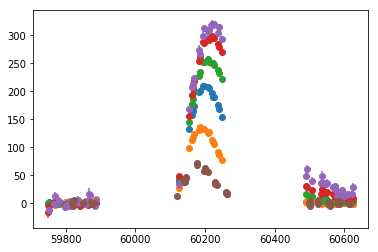

In [420]:
object_id = 76304
sample_data = train_ts.query('object_id == @object_id')

for passband in sample_data.passband.unique():
    extract_pb = sample_data.query('passband == @passband')
    plt.errorbar(extract_pb.mjd, extract_pb.flux, extract_pb.flux_err, fmt='o')

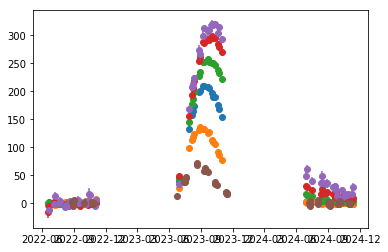

In [421]:
pivot = pd.pivot_table(sample_data, index=pd.Grouper(key='mjd_dt', freq='1d'),
                       columns='passband', values=['flux', 'flux_err'], aggfunc=[np.mean])
pivot.reset_index(drop=False, inplace=True)
pivot.head()

for passband in sample_data.passband.unique():
    plt.errorbar(pivot.mjd_dt.values, 
                 pivot["mean"]["flux"][passband].values, 
                 pivot["mean"]["flux_err"][passband].values, fmt='o')

In [422]:
pivot["mean"]["flux"].head()

passband,0,1,2,3,4,5
0,NaN,-1.478270,-2.672873,1.330035,-15.777205,NaN
1,NaN,-0.084916,1.783690,-0.048919,-4.144871,-12.400036
2,NaN,-0.865526,-0.901147,-1.058628,2.933945,-1.545054
3,NaN,-2.829772,1.964506,-1.134098,-0.338913,13.311126
4,NaN,-1.946006,-1.870046,-1.715126,2.320163,0.609830


1 5 113
argmax1. 55 3
argmax2. 56 1
argmax3. 54 5


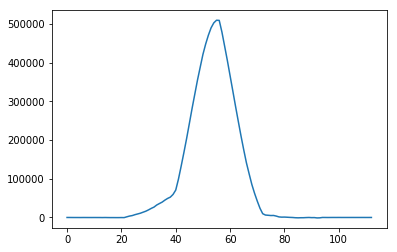

2 5 113
argmax1. 56 1
argmax2. 55 3
argmax3. 54 5


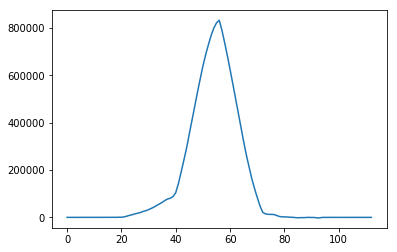

3 5 113
argmax1. 56 1
argmax2. 55 3
argmax3. 57 -1


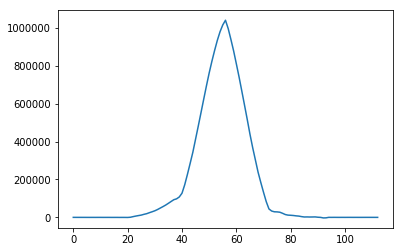

4 5 113
argmax1. 56 1
argmax2. 55 3
argmax3. 57 -1


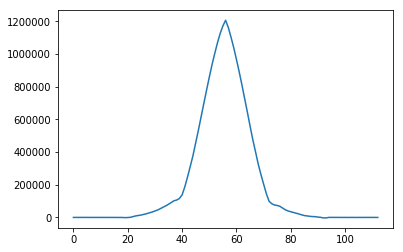

In [423]:
comb = [(0, 5), (1, 5), (2, 5), (3, 5), (4, 5)]
for base_pb, target_pb in comb:
    extract = pivot["mean"]["flux"][[base_pb, target_pb]].dropna().copy()
    if extract.shape[0] == 0:
        continue

    correlate = np.correlate(extract[base_pb], extract[target_pb], "full")
    print(base_pb, target_pb, len(correlate))
    print("argmax1.", correlate.argmax(), len(correlate)-correlate.argmax()*2)
    print("argmax2.", np.argsort(correlate)[::-1][1], len(correlate)-np.argsort(correlate)[::-1][1]*2)
    print("argmax3.", np.argsort(correlate)[::-1][2], len(correlate)-np.argsort(correlate)[::-1][2]*2)
    plt.plot(correlate)
    plt.show()

In [413]:
correlate.argmax()

27

In [331]:
pivot["mean"]["flux"][4].dropna()

0    -10.118233
1    -12.722282
2     -8.027454
3    -10.849970
4     -6.322140
5     -6.895031
6    -11.053581
7     -9.422325
8     -9.756556
9    -10.581810
11   -13.955785
12   -11.404847
13    -9.126980
14   -12.850839
15   -11.162708
16   -13.315200
Name: 4, dtype: float64

### 特徴量計算用テスト

In [2]:
# 設定するべきパラメータ
freq = '30d'

In [3]:
# データの読み込み
train_ts = pd.read_csv("../data/input/training_set.csv")
train_ts['mjd_dt'] = pd.to_datetime(Time(train_ts.mjd.values, format='mjd').iso)
train_ts = train_ts.sort_values(['object_id', 'mjd'])
display(train_ts.head())

,object_id,mjd,passband,flux,flux_err,detected,mjd_dt
0,615,59750.4229,2,-544.810303,3.622952,1,2022-06-20 10:08:58.560
1,615,59750.4306,1,-816.434326,5.553370,1,2022-06-20 10:20:03.840
2,615,59750.4383,3,-471.385529,3.801213,1,2022-06-20 10:31:09.120
3,615,59750.4450,4,-388.984985,11.395031,1,2022-06-20 10:40:48.000
4,615,59752.4070,2,-681.858887,4.041204,1,2022-06-22 09:46:04.800


In [7]:
# Grouperを使った集約
pivot = pd.pivot_table(train_ts, index=['object_id', pd.Grouper(key='mjd_dt', freq=freq)],
                       columns='passband', values=['flux', 'flux_err'], aggfunc=[np.mean])
pivot.reset_index(drop=False, inplace=True)
pivot.head()

object_id                  mjd_dt       mean                          \
                                                 flux                           
passband                                            0           1           2   
0              615 2022-05-31 00:49:23.520        NaN -938.945678 -613.334595   
1              615 2022-06-30 00:49:23.520        NaN -751.332375 -503.369988   
2              615 2022-07-30 00:49:23.520   6.878784 -376.640616 -143.477466   
3              615 2022-08-29 00:49:23.520 -37.472954 -712.001541 -398.733591   
4              615 2022-09-28 00:49:23.520 -73.571703  -71.289753  116.399495   

                                                                            \
                                              flux_err                       
passband           3           4           5         0         1         2   
0        -498.170060 -391.232605 -355.886780       NaN  6.013182  3.832078   
1        -446.939911 -390.251037 -406.094208       NaN  5.375865  3.635662   
2        -161.632435 -133.040127 -136.514786  3.633152  4.494687  3.169810   
3        -297.426488 -169.170120 -158.651011  4.095057  5.367351  3.284251   
4          68.264479  102.162855   82.559611  3.216971  4.736331  3.363564   

                                         
                                         
passband         3         4          5  
0         3.676982  7.497189  10.421921  
1         3.620821  3.860475   7.613099  
2         3.322341  3.673642   7.342296  
3         3.205929  3.447867   6.716893  
4         3.175394  3.581426   7.379023

In [18]:
%%time
comb = list(itertools.combinations(train_ts.passband.unique(), 2))
col_list = []

for base_pb, target_pb in comb:
    pivot[f"flux_{target_pb}-{base_pb}"] = pivot["mean"]["flux"][target_pb] - pivot["mean"]["flux"][base_pb]
    pivot[f"flux_err_{target_pb}-{base_pb}"] = \
        np.sqrt(pivot["mean"]["flux_err"][target_pb]**2 + pivot["mean"]["flux_err"][base_pb]**2)
    col_list.extend([f"flux_{target_pb}-{base_pb}", f"flux_err_{target_pb}-{base_pb}"])

display(pivot.head())

object_id                  mjd_dt       mean                          \
                                                 flux                           
passband                                            0           1           2   
0              615 2022-05-31 00:49:23.520        NaN -938.945678 -613.334595   
1              615 2022-06-30 00:49:23.520        NaN -751.332375 -503.369988   
2              615 2022-07-30 00:49:23.520   6.878784 -376.640616 -143.477466   
3              615 2022-08-29 00:49:23.520 -37.472954 -712.001541 -398.733591   
4              615 2022-09-28 00:49:23.520 -73.571703  -71.289753  116.399495   

                                                                     ...       \
                                              flux_err               ...        
passband           3           4           5         0         1     ...        
0        -498.170060 -391.232605 -355.886780       NaN  6.013182     ...        
1        -446.939911 -390.251037 -406.094208       NaN  5.375865     ...        
2        -161.632435 -133.040127 -136.514786  3.633152  4.494687     ...        
3        -297.426488 -169.170120 -158.651011  4.095057  5.367351     ...        
4          68.264479  102.162855   82.559611  3.216971  4.736331     ...        

            flux_5-3 flux_err_5-3    flux_0-3 flux_err_0-3   flux_5-4  \
                                                                        
passband                                                                
0         142.283280    11.051544         NaN          NaN  35.345825   
1          40.845703     8.430280         NaN          NaN -15.843170   
2          25.117649     8.058986  168.511219     4.923184  -3.474659   
3         138.775477     7.442757  259.953534     5.200718  10.519109   
4          14.295132     8.033250 -141.836183     4.520181 -19.603244   

         flux_err_5-4    flux_0-4 flux_err_0-4    flux_0-5 flux_err_0-5  
                                                                         
passband                                                                 
0           12.838391         NaN          NaN         NaN          NaN  
1            8.535956         NaN          NaN         NaN          NaN  
2            8.210052  139.918911     5.166763  143.393570     8.192014  
3            7.550128  131.697166     5.353249  121.178057     7.866775  
4            8.202231 -175.734558     4.814095 -156.131314     8.049776  

[5 rows x 44 columns]

CPU times: user 2.92 s, sys: 1.71 s, total: 4.63 s
Wall time: 1.16 s


In [21]:
agg_result = pivot[['object_id']+col_list].groupby('object_id').agg([np.mean])
agg_result.head()

,flux_1-2,flux_err_1-2,flux_3-2,flux_err_3-2,flux_4-2,flux_err_4-2,flux_5-2,flux_err_5-2,flux_0-2,flux_err_0-2,...,flux_5-3,flux_err_5-3,flux_0-3,flux_err_0-3,flux_5-4,flux_err_5-4,flux_0-4,flux_err_0-4,flux_0-5,flux_err_0-5
,,,,,,,,,,,...,,,,,,,,,,
,,,,,,,,,,,...,,,,,,,,,,
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
object_id,,,,,,,,,,,,,,,,,,,,,
615,-243.982109,6.212897,1.700742,4.845721,67.412958,5.242459,70.437050,8.433687,96.589254,5.201582,...,68.736308,8.402824,107.931456,5.138433,3.024092,8.631987,41.492412,5.358649,37.492782,8.520378
713,-0.158218,1.959052,-0.092865,2.075291,-0.195083,2.593970,-0.513022,5.410797,-0.620531,2.633614,...,-0.420157,5.516872,-0.318628,2.855336,-0.317939,5.730495,-0.530309,3.256543,1.456243,5.774875
730,-3.171237,1.946775,1.199131,2.182717,2.612597,2.782881,2.636067,6.045585,-2.180691,2.472444,...,1.436936,6.168051,-2.539344,2.755835,0.023470,6.401465,-3.563719,3.229574,-3.427931,6.151961
745,-5.639324,1.764562,3.859317,2.051559,1.865889,3.049707,-2.811246,7.313904,-20.232687,2.339209,...,-6.670563,7.425124,-24.362462,2.627587,-4.677135,7.896781,-22.244340,3.506595,-17.034079,7.575990
1124,-6.289045,2.303991,0.989562,2.462724,-0.373443,3.276406,-3.549902,6.750102,-13.245189,2.752441,...,-4.539464,6.878294,-14.556172,3.061263,-3.176459,7.207401,-13.538127,3.579140,-9.216443,6.881566


In [315]:
agg_result = pivot[['object_id']+col_list].groupby('object_id').agg([np.mean, np.max, np.std])
agg_result.head()

flux_1-2                       flux_err_1-2                      \
                                                                               
                                                                               
                 mean       amax        std         mean      amax       std   
object_id                                                                      
615       -243.982109  48.641785  97.383607     6.212897  7.483751  0.576525   
713         -0.158218   1.892507   0.904494     1.959052  2.646983  0.349719   
730         -3.171237   2.011135   5.964592     1.946775  3.182122  0.608091   
745         -5.639324   0.763506  10.985822     1.764562  2.352811  0.361202   
1124        -6.289045   2.384947  14.510369     2.303991  3.806201  0.608759   

           flux_3-2                         flux_err_3-2    ...     \
                                                            ...      
                                                            ...      
               mean        amax         std         mean    ...      
object_id                                                   ...      
615        1.700742  115.164535  131.948318     4.845721    ...      
713       -0.092865    2.015234    0.983932     2.075291    ...      
730        1.199131   11.376721    3.116231     2.182717    ...      
745        3.859317   42.018485   12.730285     2.051559    ...      
1124       0.989562   21.787176    5.717828     2.462724    ...      

             flux_0-4 flux_err_0-4                       flux_0-5              \
                                                                                
                                                                                
                  std         mean      amax       std       mean        amax   
object_id                                                                       
615        172.790630     5.358649  5.924283  0.331106  37.492782  455.995622   
713          2.170178     3.256543  3.811400  0.366651   1.456243   10.154435   
730          8.648658     3.229574  3.907326  0.366029  -3.427931    7.215110   
745         49.228442     3.506595  8.254711  1.422221 -17.034079    4.656823   
1124        30.826545     3.579140  3.999276  0.359115  -9.216443    2.643020   

                      flux_err_0-5                       
                                                         
                                                         
                  std         mean       amax       std  
object_id                                                
615        171.652768     8.520378   9.948208  0.593509  
713          3.726627     5.774875   6.619135  0.596385  
730         10.400441     6.151961   7.236317  0.701423  
745         37.104817     7.575990  22.667924  4.663844  
1124        24.354799     6.881566   8.345300  0.657240  

[5 rows x 90 columns]

In [316]:
cols = ['_'.join([s for s in col if len(s)!=0]) if len(col)!=1 else col for col in agg_result.columns]
agg_result.columns = cols
agg_result.head()

,flux_1-2_mean,flux_1-2_amax,flux_1-2_std,flux_err_1-2_mean,flux_err_1-2_amax,flux_err_1-2_std,flux_3-2_mean,flux_3-2_amax,flux_3-2_std,flux_err_3-2_mean,...,flux_0-4_std,flux_err_0-4_mean,flux_err_0-4_amax,flux_err_0-4_std,flux_0-5_mean,flux_0-5_amax,flux_0-5_std,flux_err_0-5_mean,flux_err_0-5_amax,flux_err_0-5_std
object_id,,,,,,,,,,,,,,,,,,,,,
615,-243.982109,48.641785,97.383607,6.212897,7.483751,0.576525,1.700742,115.164535,131.948318,4.845721,...,172.790630,5.358649,5.924283,0.331106,37.492782,455.995622,171.652768,8.520378,9.948208,0.593509
713,-0.158218,1.892507,0.904494,1.959052,2.646983,0.349719,-0.092865,2.015234,0.983932,2.075291,...,2.170178,3.256543,3.811400,0.366651,1.456243,10.154435,3.726627,5.774875,6.619135,0.596385
730,-3.171237,2.011135,5.964592,1.946775,3.182122,0.608091,1.199131,11.376721,3.116231,2.182717,...,8.648658,3.229574,3.907326,0.366029,-3.427931,7.215110,10.400441,6.151961,7.236317,0.701423
745,-5.639324,0.763506,10.985822,1.764562,2.352811,0.361202,3.859317,42.018485,12.730285,2.051559,...,49.228442,3.506595,8.254711,1.422221,-17.034079,4.656823,37.104817,7.575990,22.667924,4.663844
1124,-6.289045,2.384947,14.510369,2.303991,3.806201,0.608759,0.989562,21.787176,5.717828,2.462724,...,30.826545,3.579140,3.999276,0.359115,-9.216443,2.643020,24.354799,6.881566,8.345300,0.657240
